# Credit Card Defult Detection

### Data: Number of Instances: 30000

In [12]:
# loading library
import pandas as pd
import numpy as np

#model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from termcolor import colored as cl # text customization
from sklearn.preprocessing import StandardScaler

### Import Data

In [13]:
# loading data
# create URL

# load dataset
df = pd.read_excel("/Users/wangtingting/Documents/763-Project/default of credit card clients.xls", 
                          sheet_name = 0, header =1)
# view first two row
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [14]:
dataframe.shape

(30000, 25)

In [15]:

group_names=['under_30', '31to40', '41to50', '51to60','over60']
df["AGE"] = pd.qcut(df["AGE"],5, labels=group_names)
categories = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ,'SEX', 'AGE','EDUCATION', 'MARRIAGE', 'default payment next month']
df = pd.get_dummies(df, columns=categories, drop_first=True)

numerical_data = df.select_dtypes(exclude=['uint8']).columns

sc = StandardScaler()
df[numerical_data] = sc.fit_transform(df[numerical_data])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            30000 non-null  float64
 1   LIMIT_BAL                     30000 non-null  float64
 2   BILL_AMT1                     30000 non-null  float64
 3   BILL_AMT2                     30000 non-null  float64
 4   BILL_AMT3                     30000 non-null  float64
 5   BILL_AMT4                     30000 non-null  float64
 6   BILL_AMT5                     30000 non-null  float64
 7   BILL_AMT6                     30000 non-null  float64
 8   PAY_AMT1                      30000 non-null  float64
 9   PAY_AMT2                      30000 non-null  float64
 10  PAY_AMT3                      30000 non-null  float64
 11  PAY_AMT4                      30000 non-null  float64
 12  PAY_AMT5                      30000 non-null  float64
 13  P

In [17]:
df.columns

Index(['ID', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7',
       'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'SEX_2', 'AGE_31to40', 'AGE_41to50', 'AGE_51to60',
       'AGE_over60', 'EDUCATION_1', 'EDUCATIO

In [18]:
# remove useless column
data_after_drop=df.drop(['ID'], axis=1)
#There are 15 columns left
data_after_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LIMIT_BAL                     30000 non-null  float64
 1   BILL_AMT1                     30000 non-null  float64
 2   BILL_AMT2                     30000 non-null  float64
 3   BILL_AMT3                     30000 non-null  float64
 4   BILL_AMT4                     30000 non-null  float64
 5   BILL_AMT5                     30000 non-null  float64
 6   BILL_AMT6                     30000 non-null  float64
 7   PAY_AMT1                      30000 non-null  float64
 8   PAY_AMT2                      30000 non-null  float64
 9   PAY_AMT3                      30000 non-null  float64
 10  PAY_AMT4                      30000 non-null  float64
 11  PAY_AMT5                      30000 non-null  float64
 12  PAY_AMT6                      30000 non-null  float64
 13  P

In [35]:
# rename target column 
df = data_after_drop.rename(columns={'default payment next month_1':'default_payment_next_month'})

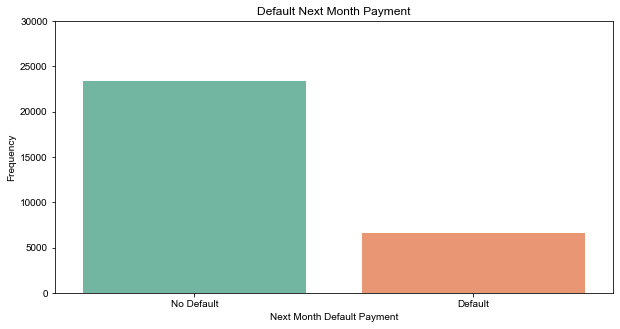

In [36]:
# check target balance or unbalance?
plt.title('Default Next Month Payment')
ax = sns.countplot(x = df.default_payment_next_month ,palette="Set2")
sns.set(font_scale= 1.0)
ax.set_ylim(top = 30000)
ax.set_xticklabels(['No Default','Default'])
ax.set_xlabel('Next Month Default Payment')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)

plt.show()

In [38]:
df.dtypes

LIMIT_BAL                     float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
                               ...   
EDUCATION_6                     uint8
MARRIAGE_1                      uint8
MARRIAGE_2                      uint8
MARRIAGE_3                      uint8
default_payment_next_month      uint8
Length: 86, dtype: object

In [39]:
df.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7',
       'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'SEX_2', 'AGE_31to40', 'AGE_41to50', 'AGE_51to60',
       'AGE_over60', 'EDUCATION_1', 'EDUCATION_2', 

In [40]:
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [41]:
# df.to_csv('Credit_card_default.CSV')
# df.to_excel('Credit_card_default.xls', engine = 'xlsxwriter')

In [42]:
# Balance dataset 
arr_1 = df[df['default_payment_next_month'] == 1].sample(n = 5000)
arr_2 = df[df['default_payment_next_month'] == 0].sample(n = 5000)

frames = [arr_1, arr_2]
df = pd.concat(frames)
df=df.sample(frac=1)

### After balance

In [43]:
df['default_payment_next_month'].value_counts()

1    5000
0    5000
Name: default_payment_next_month, dtype: int64

In [44]:
# check up the target and features
X = df.drop(['default_payment_next_month'], axis=1)

In [45]:
X

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,AGE_over60,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
17907,-0.905498,-0.675638,-0.613903,-0.623320,-0.622040,-0.638830,-0.646175,-0.010722,-0.256990,-0.240005,...,0,0,1,0,0,0,0,0,1,0
4147,-1.136720,-0.558003,-0.523419,-0.512849,-0.501975,-0.471665,-0.443801,-0.215153,-0.256990,-0.296801,...,0,0,0,1,0,0,0,1,0,0
29281,-1.213794,-0.563408,-0.551225,-0.536584,-0.541147,-0.596278,-0.652724,-0.260314,-0.213588,-0.296801,...,0,0,0,1,0,0,0,0,1,0
28223,0.096463,-0.655701,-0.670807,-0.491911,-0.625460,-0.627398,-0.644547,-0.254820,0.305672,-0.124083,...,0,0,0,1,0,0,0,0,1,0
3926,-1.136720,-0.455307,-0.431825,-0.398441,-0.385858,-0.353401,-0.362043,-0.243288,-0.188805,-0.261076,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10389,-1.136720,-0.673234,-0.667800,-0.654136,-0.646849,-0.635919,-0.625018,-0.341942,-0.256990,-0.296801,...,0,0,1,0,0,0,0,1,0,0
27937,-0.365981,-0.543023,-0.690983,-0.677929,-0.672497,-0.663059,-0.652724,-0.341942,-0.256990,-0.296801,...,0,0,1,0,0,0,0,0,1,0
14439,-0.905498,-0.326712,-0.266803,-0.253678,-0.227119,-0.103286,-0.100058,-0.114386,-0.256990,-0.296801,...,0,1,0,0,0,0,0,0,1,0
24709,-0.828424,0.062575,0.158079,0.171495,0.247888,0.069241,-0.123835,0.180910,-0.256990,-0.174688,...,0,0,1,0,0,0,0,1,0,0


In [46]:
y = df['default_payment_next_month']

In [47]:
#importing libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [48]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y) # 80% training and 20% test

## MODEL - Logistic

In [49]:
# load library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import l1_min_c
from time import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path
from sklearn.model_selection import KFold, cross_val_score

In [50]:
lasso = linear_model.Lasso(alpha=0.03)
lasso_reg = lasso.fit(X_train, y_train)
X_train.columns
lasso_reg.intercept_, lasso_reg.coef_

(0.5033569164886624,
 array([-0.0565939 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.10826683,
         0.        ,  0.13326858,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
        -0.        ,  0.05451932,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.01843351,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.      

In [51]:
l_predict = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, l_predict)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse    #Lower is better.
l_crossv = cross_val_score(lasso, X_train, y_train, cv=10)
print(cross_val_score(lasso, X_train, y_train, cv=10))
l_crossv.mean()
l_crossv.std()

[0.16027388 0.1431963  0.12840149 0.12890033 0.15336432 0.1349604
 0.16346938 0.12030732 0.15942444 0.13341119]


0.014752004716099746

array([5.00000000e+00, 4.55581378e+00, 4.15108784e+00, 3.78231664e+00,
       3.44630605e+00, 3.14014572e+00, 2.86118383e+00, 2.60700414e+00,
       2.37540508e+00, 2.16438064e+00, 1.97210303e+00, 1.79690683e+00,
       1.63727458e+00, 1.49182362e+00, 1.35929412e+00, 1.23853818e+00,
       1.12850986e+00, 1.02825615e+00, 9.36908711e-01, 8.53676324e-01,
       7.77838072e-01, 7.08737081e-01, 6.45774833e-01, 5.88405976e-01,
       5.36133611e-01, 4.88504979e-01, 4.45107543e-01, 4.05565415e-01,
       3.69536102e-01, 3.36707533e-01, 3.06795364e-01, 2.79540509e-01,
       2.54706901e-01, 2.32079442e-01, 2.11462144e-01, 1.92676430e-01,
       1.75559587e-01, 1.59963357e-01, 1.45752653e-01, 1.32804389e-01,
       1.21006413e-01, 1.10256537e-01, 1.00461650e-01, 9.15369140e-02,
       8.34050269e-02, 7.59955541e-02, 6.92443186e-02, 6.30928442e-02,
       5.74878498e-02, 5.23807876e-02, 4.77274228e-02, 4.34874501e-02,
       3.96241449e-02, 3.61040451e-02, 3.28966612e-02, 2.99742125e-02,
      

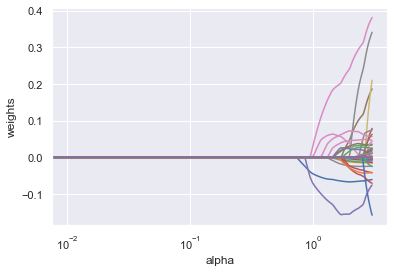

In [52]:
coefs = []
alphas = 10**np.linspace(1,-3,100)*0.5
alphas
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(-np.log10(alphas*2), coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
10**np.linspace(1,-3,100)*0.5

In [53]:
eps = 5e-2  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps, fit_intercept=True)

Computing regularization path using the lasso...


array([0.283875  , 0.27541363, 0.26720447, 0.25923999, 0.25151291,
       0.24401614, 0.23674284, 0.22968632, 0.22284013, 0.21619801,
       0.20975387, 0.2035018 , 0.19743609, 0.19155118, 0.18584167,
       0.18030235, 0.17492814, 0.16971411, 0.1646555 , 0.15974767,
       0.15498612, 0.1503665 , 0.14588457, 0.14153624, 0.13731752,
       0.13322454, 0.12925356, 0.12540094, 0.12166315, 0.11803678,
       0.1145185 , 0.11110508, 0.10779341, 0.10458044, 0.10146325,
       0.09843897, 0.09550483, 0.09265815, 0.08989632, 0.08721681,
       0.08461716, 0.08209501, 0.07964803, 0.07727399, 0.0749707 ,
       0.07273608, 0.07056806, 0.06846466, 0.06642395, 0.06444408,
       0.06252321, 0.0606596 , 0.05885154, 0.05709737, 0.05539549,
       0.05374434, 0.0521424 , 0.05058821, 0.04908034, 0.04761742,
       0.0461981 , 0.04482109, 0.04348512, 0.04218897, 0.04093146,
       0.03971143, 0.03852777, 0.03737938, 0.03626523, 0.03518428,
       0.03413555, 0.03311809, 0.03213095, 0.03117323, 0.03024

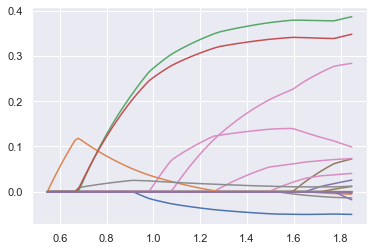

In [54]:
plt.figure()
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)
alphas_lasso

In [55]:
lassolf = LogisticRegression(penalty='l1', solver='liblinear',
                               intercept_scaling=True).fit(X_train, y_train)

In [56]:
predictions = lassolf.predict(X_test)
y_scores = lassolf.predict_proba(X_test)[:,1]

In [57]:
# %% Define regression fit function.

def lasso_fit(a, b):
    clf = linear_model.Lasso(alpha=0.0001)
    lasso_reg = clf.fit(a, b)
    return lasso_reg

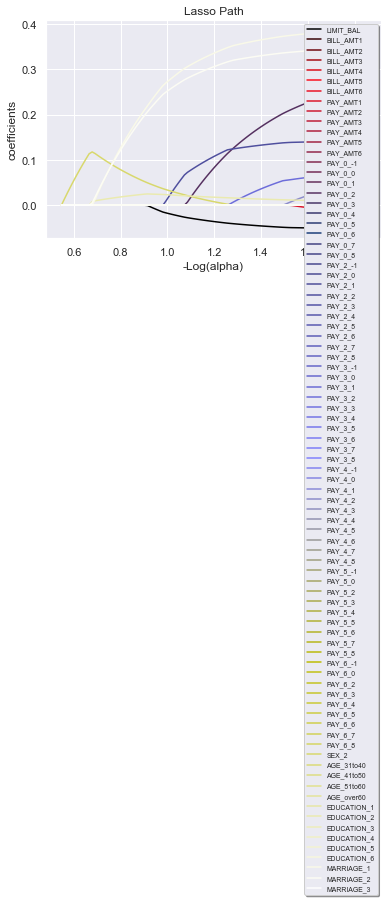

In [58]:
# %% Run Logistic Lasso regression.

lasso = lasso_fit(X_train, y_train)

# %% Plot Lasso path.
eps = 5e-2
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps, fit_intercept=False)
lnames = tuple(X_train.columns)

number = len(X_train.columns)
cmap = plt.get_cmap('gist_stern')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.figure(1)
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, color in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, color=color)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.legend((lnames), loc='best', fontsize='xx-small', shadow=True)
plt.show()

[[802 198]
 [427 573]]
0.6470920383963862


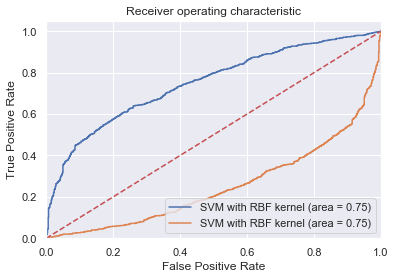

In [59]:
lassolf = LogisticRegression(penalty='l1', solver='liblinear',
                               intercept_scaling=True).fit(X_train, y_train)

prediction = lassolf.predict(X_test)

prediction = pd.Series(prediction)
confusions = confusion_matrix(y_test, prediction)
print(confusions)

from sklearn.metrics import f1_score
print(f1_score(y_test, prediction))

rbf_probability = lassolf.predict_proba(X_test)
rbf_roc_auc = roc_auc_score(y_test, rbf_probability[:, 1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, rbf_probability[:, 1])
fpr0, tpr0, thresholds0 = roc_curve(y_test, rbf_probability[:, 0])
plt.figure()
plt.plot(fpr1, tpr1, label='SVM with RBF kernel (area = %0.2f)' % rbf_roc_auc)
plt.plot(fpr0, tpr0, label='SVM with RBF kernel (area = %0.2f)' % rbf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RBF_ROC')
plt.show()

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


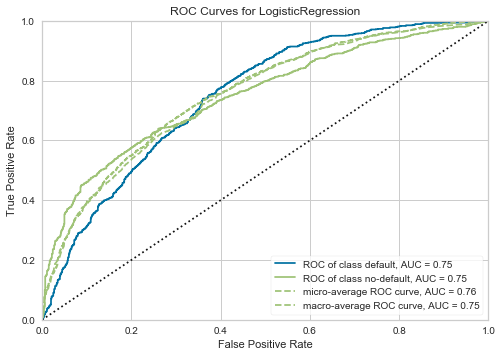

In [60]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lassolf, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [61]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lassolf, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())

0.70875


In [62]:
# check CFM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_scores))

[[802 198]
 [427 573]]


              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1000
           1       0.74      0.57      0.65      1000

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.68      2000
weighted avg       0.70      0.69      0.68      2000

roc_auc_score for Logistic Regression:  0.7486035


## Multiple - MODEL

roc_auc_score for DecisionTree:  0.6119950000000001
roc_auc_score for Logistic Regression:  0.7541985


/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


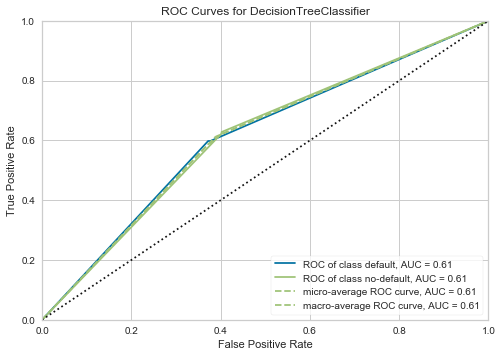

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


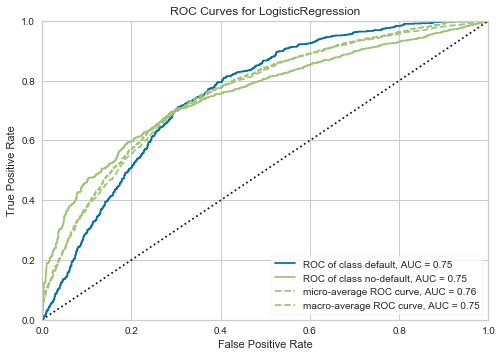

In [63]:
from sklearn import preprocessing

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

# Creating classifier
clf_tree = DecisionTreeClassifier(); clf_reg = LogisticRegression(penalty='l1',solver='liblinear'); 

# Training model
clf_tree.fit(X_train, y_train); clf_reg.fit(X_train, y_train);

# Getting predicted probabilities
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
#false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

# plot roc curve for each class

visualizer = ROCAUC(clf_tree, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure

# plot roc curve for each class

visualizer = ROCAUC(clf_reg, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure



Accuracy score of the Decision Tree model is:  0.682125
roc_auc_score for Decision Tree:  0.7265834999999999


/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


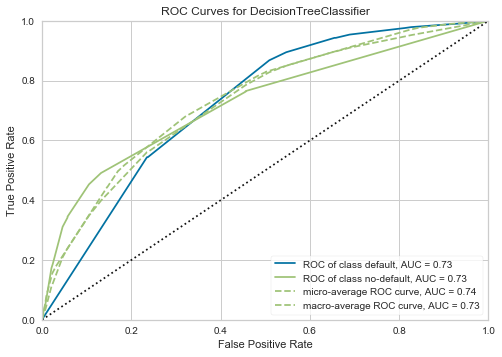

Accuracy score of the KNN model is :  0.665875
roc_auc_score for the KNN model:  0.7073489999999999


/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


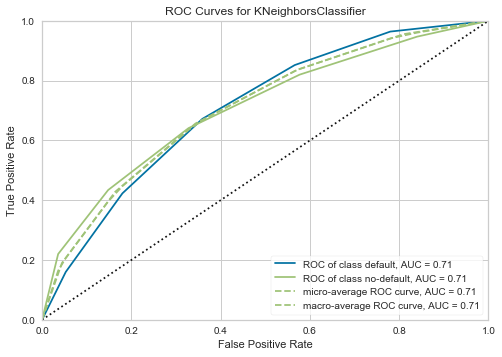

Accuracy score of the Logistic Regression model is :  0.7125
roc_auc_score for the Logistic Regression model:  0.7541725


/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


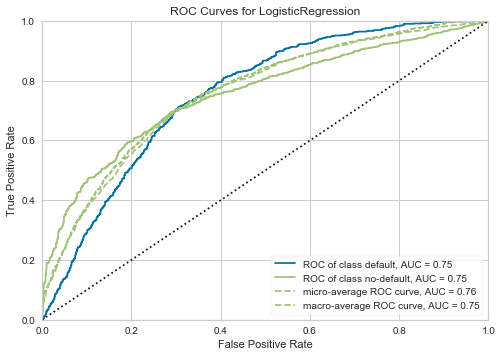

Accuracy score of the SVM model is :  0.7008749999999999
roc_auc_score for the SVM model:  0.7541015000000001


/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


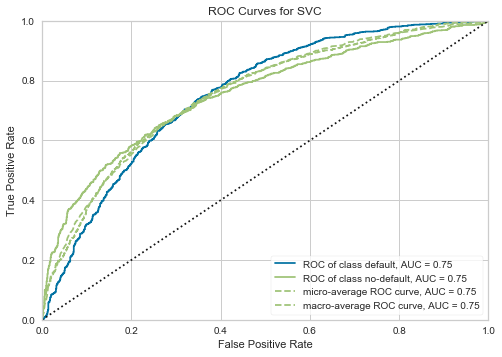

Accuracy score of the Random Forest Tree model is :  0.708875
roc_auc_score for the Random Forest Tree model:  0.7486119999999999


/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


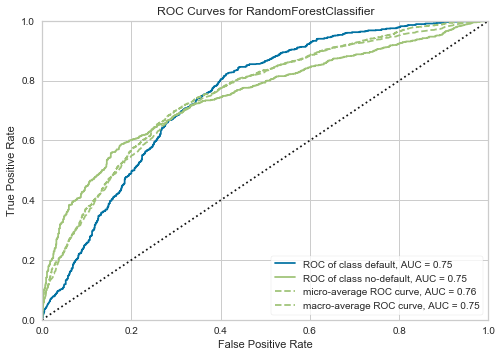

In [64]:
# MODELING

# 1. Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
y_scores = tree_model.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for Decision Tree
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=tree_model, X=X_train, y=y_train, cv=10)
print("Accuracy score of the Decision Tree model is: ",modelAccuracies.mean())
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_scores))
# plot roc curve for each class

visualizer = ROCAUC(tree_model, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure



# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
y_scores = knn.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for K-Nearest Neighbors
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print('Accuracy score of the KNN model is : ',modelAccuracies.mean())
print('roc_auc_score for the KNN model: ', roc_auc_score(y_test, y_scores))
# plot roc curve for each class

visualizer = ROCAUC(knn, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure

# 3. Logistic Regression

lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
y_scores = lr.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for Logistic Regression
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print('Accuracy score of the Logistic Regression model is : ',modelAccuracies.mean())
print('roc_auc_score for the Logistic Regression model: ', roc_auc_score(y_test, y_scores))
# plot roc curve for each class

visualizer = ROCAUC(lr, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure
      
      
# 4. SVM 
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1,gamma='auto',probability=True)
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
y_scores = svm.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for SVM 
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10)
print('Accuracy score of the SVM model is : ',modelAccuracies.mean())
print('roc_auc_score for the SVM model: ', roc_auc_score(y_test, y_scores))
# plot roc curve for each class

visualizer = ROCAUC(svm, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure
      
           

# 5. Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for Random Forest Tree
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print('Accuracy score of the Random Forest Tree model is : ',modelAccuracies.mean())
print('roc_auc_score for the Random Forest Tree model: ', roc_auc_score(y_test, y_scores))
# plot roc curve for each class

visualizer = ROCAUC(rf, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure
      
                 

In [65]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
# Compute confusion matrix for the models
from sklearn.metrics import confusion_matrix
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree

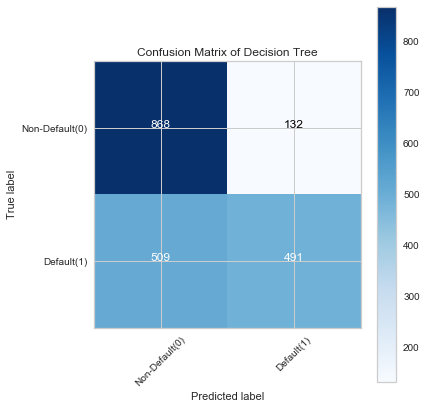

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1000
           1       0.79      0.49      0.61      1000

    accuracy                           0.68      2000
   macro avg       0.71      0.68      0.67      2000
weighted avg       0.71      0.68      0.67      2000



In [67]:
# Plot the confusion matrix
import itertools   
plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                     classes = ['Non-Default(0)','Default(1)'], 
                                     normalize = False, 
                                     title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

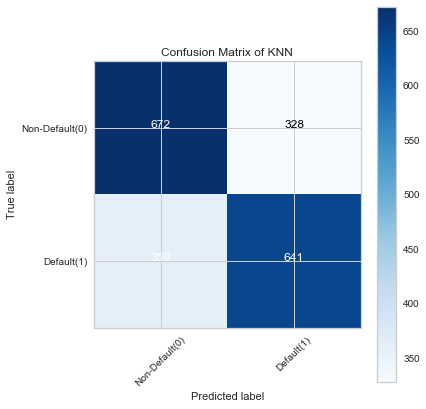

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1000
           1       0.66      0.64      0.65      1000

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



In [68]:
# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()
print(classification_report(y_test, knn_yhat))

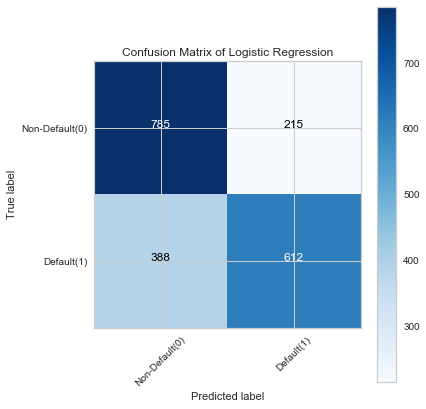

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      1000
           1       0.74      0.61      0.67      1000

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



In [69]:
# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

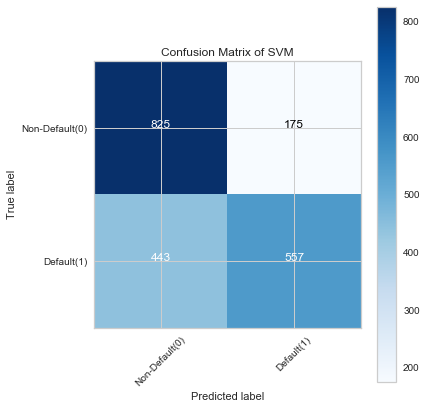

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1000
           1       0.76      0.56      0.64      1000

    accuracy                           0.69      2000
   macro avg       0.71      0.69      0.69      2000
weighted avg       0.71      0.69      0.69      2000



In [70]:
# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

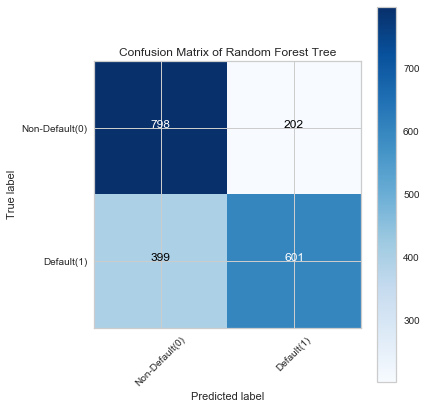

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.75      0.60      0.67      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



In [71]:
# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()
print(classification_report(y_test, rf_yhat))

## Ensemble Voting Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [73]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [74]:
eclf =  VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft',
        flatten_transform=True)
eclf = eclf.fit(X_train, y_train)
eclf_pre = eclf.predict(X_test)
y_scores = eclf.predict_proba(X_test)[:,1]

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
print(classification_report(y_test, eclf_pre))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73      1000
           1       0.85      0.39      0.53      1000

    accuracy                           0.66      2000
   macro avg       0.73      0.66      0.63      2000
weighted avg       0.73      0.66      0.63      2000



/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

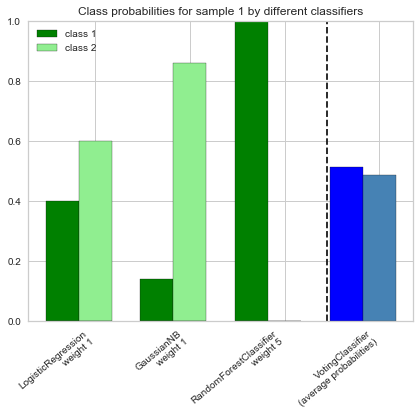

In [76]:
# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


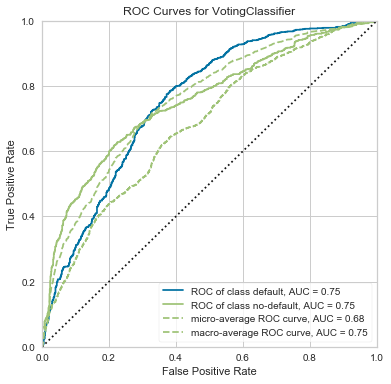

In [77]:
# plot roc curve for each class

visualizer = ROCAUC(eclf, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure
      
                 

## Gradient Boosting Regressor

In [78]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120) 
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred)         
     for y_pred in gbrt.staged_predict(X_test)] 
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators) 
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=108,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
mse = mean_squared_error(y_test, gbrt_best.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.1972


## MODEL - Random Forest 

In [80]:
# training a random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Create random forest classifier object using entropy

randomforest_entropy = RandomForestClassifier(criterion = 'entropy', random_state=0, oob_score = True)

# train model
randomforest_entropy.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [82]:
# predict target
preds = randomforest_entropy.predict(X_test)
y_scores = randomforest_entropy.predict_proba(X_test)[:,1]

In [83]:
# use the out-of-bag score
print(randomforest_entropy.oob_score_)

0.696125


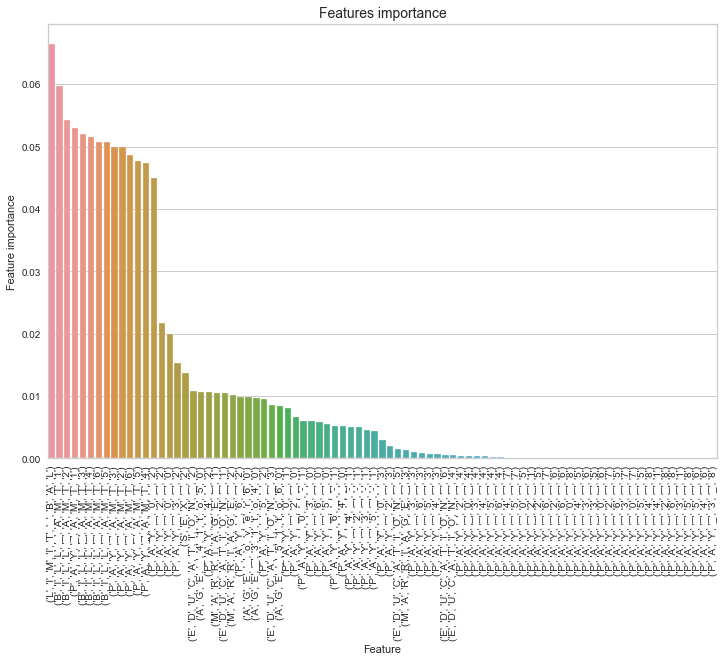

In [84]:
# Identifying Important Features in Random Forests
tmp = pd.DataFrame({'Feature': X, 'Feature importance': randomforest_entropy.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [85]:
# check CFM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[724 276]
 [370 630]]


              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1000
           1       0.70      0.63      0.66      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



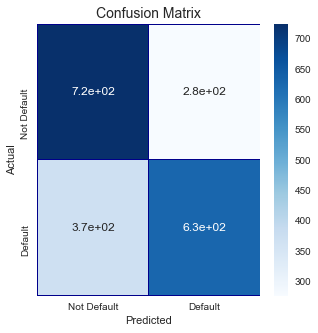

In [86]:
cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Calculating oob using different metrics

In [87]:
print(randomforest_entropy.oob_decision_function_)

[[0.66666667 0.33333333]
 [0.74285714 0.25714286]
 [0.60606061 0.39393939]
 ...
 [0.02857143 0.97142857]
 [0.38461538 0.61538462]
 [0.78571429 0.21428571]]


In [88]:
from sklearn import metrics
pred_train = np.argmax(randomforest_entropy.oob_decision_function_,axis=1)

In [89]:
metrics.roc_auc_score(y_train, pred_train)

0.696125

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


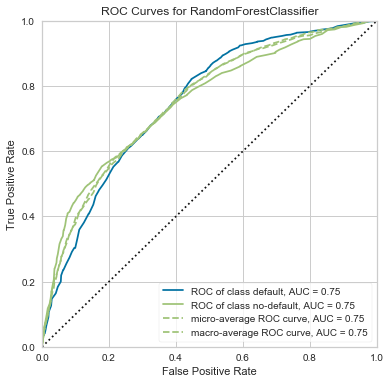

In [90]:
# plot roc curve for each class

visualizer = ROCAUC(randomforest_entropy, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure
      
                 

## MODEL - Decision Tree Classifier

In [91]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
# Create decision tree classifier object using entropy
from sklearn import tree

Accuracy is 68.4
Confusion Matrix is [[81200 18800]
 [44400 55600]]
Recall is 55.60000000000001
Precision is 74.73118279569893
[[812 188]
 [444 556]]


              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.75      0.56      0.64      1000

    accuracy                           0.68      2000
   macro avg       0.70      0.68      0.68      2000
weighted avg       0.70      0.68      0.68      2000

ROC&AUC score:  0.733668


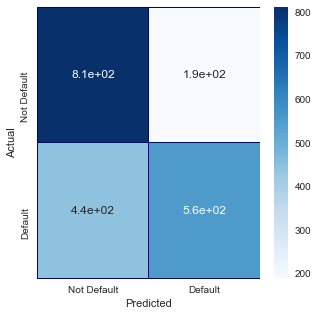

In [92]:

clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=10)
model7 = clf_entropy.fit(X_train,y_train)

y_pred_en = clf_entropy.predict(X_test)
y_scores = clf_entropy.predict_proba(X_test)[:,1]
cm = pd.crosstab(y_test, y_pred_en, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
#calculatiog accuracy
print(("Accuracy is"),accuracy_score(y_test,y_pred_en)*100)
print(("Confusion Matrix is"),confusion_matrix(y_test,y_pred_en)*100)
print(("Recall is"),recall_score(y_test,y_pred_en)*100)
print(("Precision is"),precision_score(y_test,y_pred_en)*100)

print(confusion_matrix(y_test, y_pred_en))
print('\n')
print(classification_report(y_test, y_pred_en))

print("ROC&AUC score: ", roc_auc_score(y_test, y_scores))

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


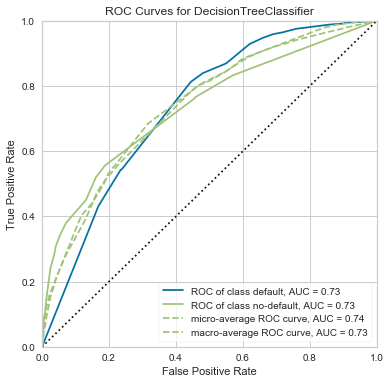

In [93]:
# plot roc curve for each class

visualizer = ROCAUC(clf_entropy, classes=["default", "no-default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        # Finalize and show the figure

In [95]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor  

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


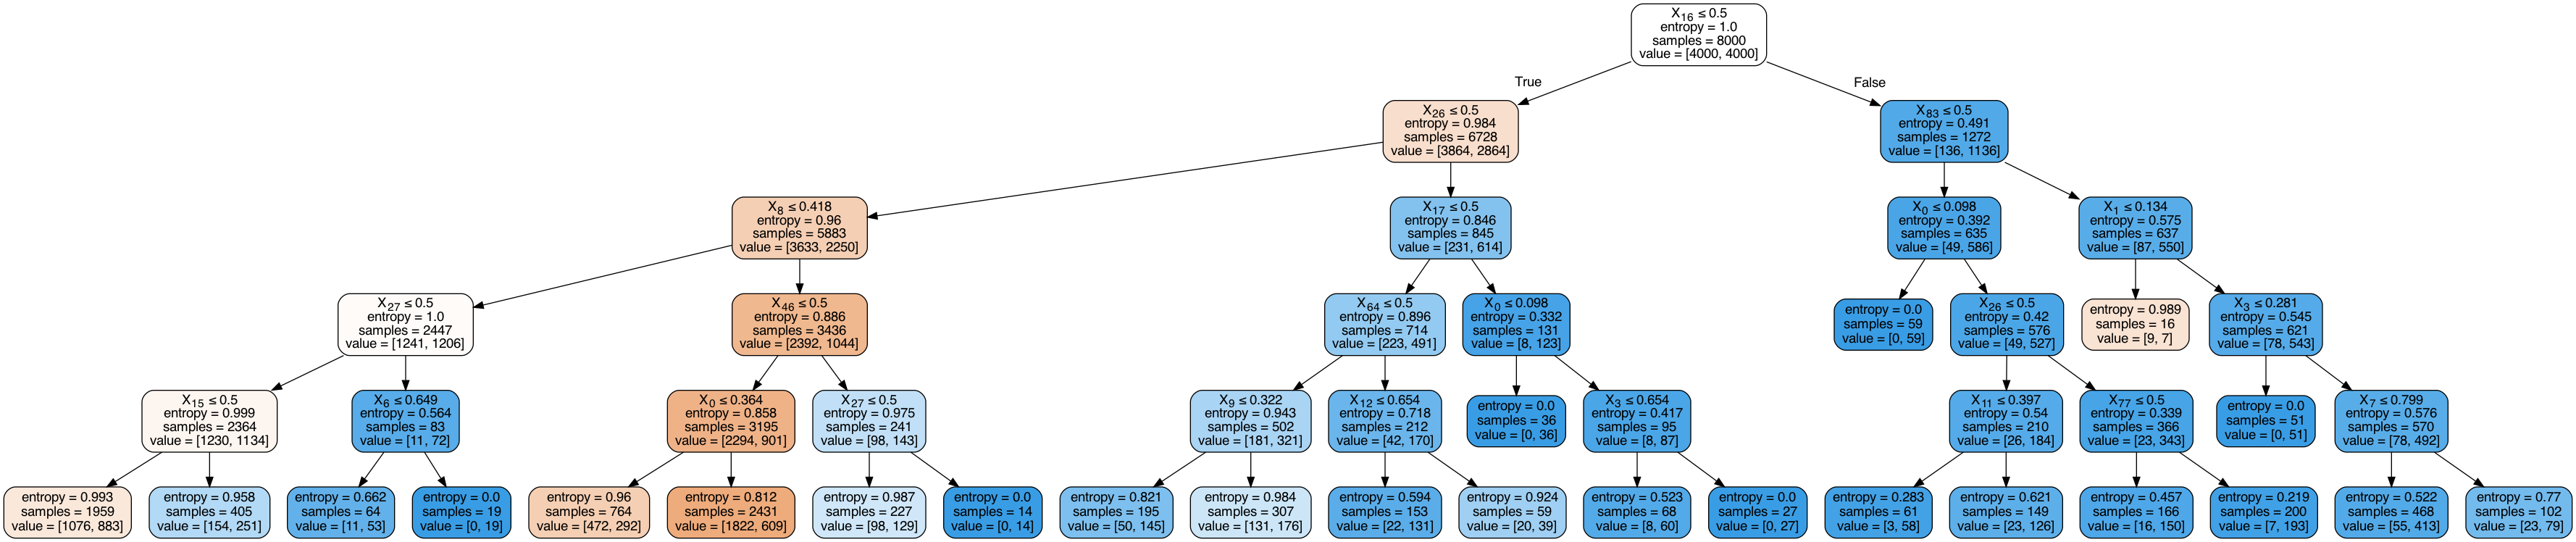

In [96]:
# build a tree graph
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 